In [1]:
import pandas as pd
import numpy as np

In [2]:
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")

rounds2 = pd.read_csv("rounds2.csv",sep=",",encoding = "ISO-8859-1")

companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
rounds2.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [4]:
rounds2['company_permalink'].nunique()

90247

In [5]:
companies['permalink'].nunique()

66368

In [6]:
companies['permalink'] = companies['permalink'].str.lower() 
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [7]:
master_frame = pd.merge(companies,rounds2,left_on='permalink', right_on='company_permalink')

In [8]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [9]:
master_frame.count(axis=0)

permalink                  114942
name                       114941
homepage_url               108810
category_list              111535
status                     114942
country_code               106271
state_code                 104003
region                     104782
city                       104785
founded_at                  94422
company_permalink          114942
funding_round_permalink    114942
funding_round_type         114942
funding_round_code          31139
funded_at                  114942
raised_amount_usd           94958
dtype: int64

In [10]:
master_frame.groupby('funding_round_type').sum().sort_values('raised_amount_usd')

,raised_amount_usd
funding_round_type,
non_equity_assistance,3.001782e+07
product_crowdfunding,5.261686e+08
equity_crowdfunding,6.611162e+08
convertible_note,2.103126e+09
secondary_market,2.389489e+09
angel,4.659255e+09
grant,9.134424e+09
seed,1.698824e+10
post_ipo_debt,2.564309e+10


In [11]:
top9 = master_frame.groupby(['country_code']).sum().sort_values('raised_amount_usd',ascending=False).head(9)

In [12]:
top9

,raised_amount_usd
country_code,
USA,6.694821e+11
CHN,7.570357e+10
GBR,3.276705e+10
IND,2.768634e+10
CAN,1.842468e+10
RUS,1.127912e+10
DEU,1.001776e+10
ISR,9.713885e+09
FRA,9.059771e+09


In [13]:
import requests
from bs4 import BeautifulSoup

In [14]:
htmlData = requests.get("https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language")

In [15]:
htmlData.headers

{'Date': 'Fri, 13 Dec 2019 16:41:11 GMT', 'Vary': 'Accept-Encoding,Cookie,Authorization', 'Server': 'ATS/8.0.5', 'X-ATS-Timestamp': '1576255271', 'Content-Type': 'text/html; charset=UTF-8', 'X-Powered-By': 'PHP/7.2.24-1+0~20191026.31+debian9~1.gbpbbacde+wmf1', 'X-Content-Type-Options': 'nosniff', 'P3P': 'CP="See https://en.wikipedia.org/wiki/Special:CentralAutoLogin/P3P for more info."', 'Content-language': 'en', 'Last-Modified': 'Sun, 08 Dec 2019 07:21:05 GMT', 'Backend-Timing': 'D=108050 t=1575789689157417', 'Content-Encoding': 'gzip', 'Content-Length': '48727', 'X-Varnish': '421569298 410312901', 'Age': '83', 'X-Cache': 'cp5011 miss, cp5012 hit/1', 'X-Cache-Status': 'hit-front', 'Server-Timing': 'cache;desc="hit-front"', 'Strict-Transport-Security': 'max-age=106384710; includeSubDomains; preload', 'Set-Cookie': 'WMF-Last-Access=13-Dec-2019;Path=/;HttpOnly;secure;Expires=Tue, 14 Jan 2020 12:00:00 GMT, WMF-Last-Access-Global=13-Dec-2019;Path=/;Domain=.wikipedia.org;HttpOnly;secure;Exp

In [16]:
soup = BeautifulSoup(htmlData.text, 'html.parser')

In [17]:
tbl = soup.find("table")

In [18]:
import pandas as pd
english_countries = pd.read_html(str(tbl))[0]

In [19]:
english_countries.head()

,Nr,Country,Alpha-3 code,Region,Population,Primary language?
0,1,Australia,AUS,Oceania,25019600,Yes
1,2,New Zealand[1],NZL,Oceania,4893830,Yes
2,3,United Kingdom,GBR,Europe,66040229,Yes
3,4,United States,USA,North America/Oceania,325719178,Yes


In [20]:
mapping = pd.read_csv("mapping.csv",encoding = "ISO-8859-1")

In [21]:
mapping.head(1000)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [22]:
mapping['main_sector'] = (mapping == 1).idxmax(axis=1)

In [23]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,NaN,0,1,0,0,0,0,0,0,0,Blanks
1,3D,0,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,0,0,0,0,1,0,0,0,0,Health
6,Ad Targeting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
7,Advanced Materials,0,0,0,0,0,1,0,0,0,Manufacturing
8,Adventure Travel,1,0,0,0,0,0,0,0,0,Automotive & Sports
9,Advertising,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"


In [24]:
master_frame['primary_sector'] = master_frame['category_list'].str.split("|",n=1,expand=False).str[0]

In [25]:
master_frame = pd.merge(master_frame,mapping,left_on="primary_sector",right_on="category_list")

In [26]:
master_frame

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,...,0,0,0,1,0,0,0,0,0,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,0,0,0,1,0,0,0,0,0,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,0,0,0,1,0,0,0,0,0,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,0,0,0,1,0,0,0,0,0,Entertainment
4,/organization/a-b-productions,A.B Productions,NaN,Media|Music|News,operating,USA,CA,Los Angeles,Los Angeles,11-12-2012,...,0,0,0,1,0,0,0,0,0,Entertainment
5,/organization/a-dance-for-me,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,Missoula,31-07-2011,...,0,0,0,1,0,0,0,0,0,Entertainment
6,/organization/ace-film-productions,ACE Film Productions,NaN,Media|News,operating,USA,NJ,Newark,Newark,01-06-2011,...,0,0,0,1,0,0,0,0,0,Entertainment
7,/organization/action-audio-apps,Action Audio Apps,http://actionaudioapps.net/,Media|News,operating,USA,NY,NY - Other,Pleasantville,12-06-2012,...,0,0,0,1,0,0,0,0,0,Entertainment
8,/organization/akira-mobile,Akira Mobile,http://www.akira.lt/en,Media|Mobile|SMS|Telecommunications,operating,LTU,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,Entertainment
9,/organization/all-day-media,ALL DAY MEDIA,http://allday.com/,Media|Social Media,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,...,0,0,0,1,0,0,0,0,0,Entertainment


In [27]:
country1 = 'IND'
country2 = 'USA'
country3 = 'PAK'
ft = 'venture'

In [31]:
d1 = master_frame[(master_frame['country_code'] == country1) & (master_frame['funding_round_type'] == 'venture')].groupby('main_sector').agg(['sum','count'])
d2 = master_frame[(master_frame['country_code'] == country2) & (master_frame['funding_round_type'] == 'venture')].groupby('main_sector').agg(['sum','count'])
d3 = master_frame[(master_frame['country_code'] == country3) & (master_frame['funding_round_type'] == 'venture')].groupby('main_sector').agg(['sum','count'])

In [32]:
d1.raised_amount_usd

,sum,count
main_sector,,
Automotive & Sports,1.556350e+09,31
Blanks,1.303500e+08,5
Cleantech / Semiconductors,7.864446e+08,54
Entertainment,9.757053e+08,75
Health,5.643700e+08,42
Manufacturing,7.302600e+08,55
"News, Search and Messaging",1.739580e+09,130
Others,6.318507e+09,281
"Social, Finance, Analytics, Advertising",8.667639e+08,77


In [33]:
d2['raised_amount_usd'].sum()

sum      3.946804e+11
count    3.372200e+04
dtype: float64

In [34]:
d3['raised_amount_usd'].sum()

sum      76625000.0
count           6.0
dtype: float64

In [35]:
d1['raised_amount_usd']

,sum,count
main_sector,,
Automotive & Sports,1.556350e+09,31
Blanks,1.303500e+08,5
Cleantech / Semiconductors,7.864446e+08,54
Entertainment,9.757053e+08,75
Health,5.643700e+08,42
Manufacturing,7.302600e+08,55
"News, Search and Messaging",1.739580e+09,130
Others,6.318507e+09,281
"Social, Finance, Analytics, Advertising",8.667639e+08,77


In [36]:
d2['raised_amount_usd']

,sum,count
main_sector,,
Automotive & Sports,1.163216e+10,505
Blanks,2.442813e+09,196
Cleantech / Semiconductors,1.187644e+11,7849
Entertainment,1.656783e+10,1756
Health,3.166093e+10,3263
Manufacturing,2.484532e+10,2453
"News, Search and Messaging",4.461932e+10,4301
Others,8.208458e+10,8243
"Social, Finance, Analytics, Advertising",6.206299e+10,5156


In [37]:
d3['raised_amount_usd']

,sum,count
main_sector,,
Blanks,0.0,0
"News, Search and Messaging",8525000.0,3
Others,64600000.0,2
"Social, Finance, Analytics, Advertising",3500000.0,1


In [38]:
d1['permalink']

,sum,count
main_sector,,
Automotive & Sports,/organization/jbr-interio/organization/jbr-int...,32
Blanks,/organization/care24/organization/forefront-ca...,8
Cleantech / Semiconductors,/organization/avesthagen/organization/celon-la...,63
Entertainment,/organization/-fame/organization/manas-informa...,88
Health,/organization/cura-healthcare/organization/cur...,56
Manufacturing,/organization/hector-beverages/organization/he...,64
"News, Search and Messaging",/organization/birds-eye-systems/organization/b...,154
Others,/organization/ameyo/organization/appdra/organi...,329
"Social, Finance, Analytics, Advertising",/organization/amagi-media-labs/organization/am...,104


In [39]:
master_frame[(master_frame['main_sector'] == 'Others') & (master_frame['country_code'] == 'IND') & (master_frame['funding_round_type'] == 'venture')].groupby('permalink').sum().sort_values('raised_amount_usd',ascending=False)

,raised_amount_usd,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
permalink,,,,,,,,,,
/organization/flipkart,2.451000e+09,0,0,0,0,0,0,0,9,0
/organization/snapdeal,3.107000e+08,0,0,0,0,0,0,0,7,0
/organization/tata-teleservices,2.120000e+08,0,0,0,0,0,0,0,1,0
/organization/myntra,1.587500e+08,0,0,0,0,0,0,0,8,0
/organization/pepperfry-com,1.280000e+08,0,0,0,0,0,0,0,4,0
/organization/delhivery,1.275000e+08,0,0,0,0,0,0,0,4,0
/organization/oyo-rooms,1.250000e+08,0,0,0,0,0,0,0,2,0
/organization/naaptol,1.062000e+08,0,0,0,0,0,0,0,4,0
/organization/igate-patni-computers,1.000000e+08,0,0,0,0,0,0,0,1,0


In [40]:
master_frame[(master_frame['main_sector'] == 'News, Search and Messaging') & (master_frame['country_code'] == 'IND')& (master_frame['funding_round_type'] == 'venture')].groupby('permalink').sum().sort_values('raised_amount_usd',ascending=False)

,raised_amount_usd,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
permalink,,,,,,,,,,
/organization/quikr-india,346000000.0,0,0,0,0,0,0,6,0,0
/organization/freecharge,113000000.0,0,0,0,0,0,0,2,0,0
/organization/micromax-informatics,88000000.0,0,0,0,0,0,0,2,0,0
/organization/hike,86000000.0,0,0,0,0,0,0,3,0,0
/organization/indiahomes,75776000.0,0,0,0,0,0,0,3,0,0
/organization/just-dial,67000000.0,0,0,0,0,0,0,2,0,0
/organization/newshunt,58000000.0,0,0,0,0,0,0,2,0,0
/organization/ramco-systems,52000000.0,0,0,0,0,0,0,1,0,0
/organization/peppertap,46000000.0,0,0,0,0,0,0,2,0,0


In [41]:
master_frame[(master_frame['main_sector'] == 'Others') & (master_frame['country_code'] == 'USA')& (master_frame['funding_round_type'] == 'venture')].groupby('permalink').sum().sort_values('raised_amount_usd',ascending=False)

,raised_amount_usd,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
permalink,,,,,,,,,,
/organization/social-finance,1.365200e+09,0,0,0,0,0,0,0,6,0
/organization/snapchat,1.165100e+09,0,0,0,0,0,0,0,6,0
/organization/livingsocial,8.182250e+08,0,0,0,0,0,0,0,8,0
/organization/facebook,6.152000e+08,0,0,0,0,0,0,0,7,0
/organization/zenefits,5.815000e+08,0,0,0,0,0,0,0,3,0
/organization/coreexpress,5.730000e+08,0,0,0,0,0,0,0,1,0
/organization/jet,5.450000e+08,0,0,0,0,0,0,0,3,0
/organization/pure-storage,4.700000e+08,0,0,0,0,0,0,0,6,0
/organization/social-finance-inc,3.980000e+08,0,0,0,0,0,0,0,4,0


In [42]:
master_frame[(master_frame['main_sector'] == 'Cleantech / Semiconductors') & (master_frame['country_code'] == 'USA')& (master_frame['funding_round_type'] == 'venture')].groupby('permalink').sum().sort_values('raised_amount_usd',ascending=False)

,raised_amount_usd,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
permalink,,,,,,,,,,
/organization/freescale,1.760000e+10,0,0,1,0,0,0,0,0,0
/organization/juno-therapeutics,1.159803e+09,0,0,4,0,0,0,0,0,0
/organization/better-place,7.750000e+08,0,0,4,0,0,0,0,0,0
/organization/brightsource-energy,5.820000e+08,0,0,6,0,0,0,0,0,0
/organization/greatpoint-energy,5.620000e+08,0,0,6,0,0,0,0,0,0
/organization/tenaska,5.500000e+08,0,0,1,0,0,0,0,0,0
/organization/stem-centrx,4.735270e+08,0,0,3,0,0,0,0,0,0
/organization/invenergy,4.590000e+08,0,0,4,0,0,0,0,0,0
/organization/miasole,4.164000e+08,0,0,5,0,0,0,0,0,0


In [43]:
master_frame[(master_frame['main_sector'] == 'Others') & (master_frame['country_code'] == 'PAK')& (master_frame['funding_round_type'] == 'venture')].groupby('permalink').sum().sort_values('raised_amount_usd',ascending=False)

,raised_amount_usd,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
permalink,,,,,,,,,,
/organization/daraz-pk,55600000.0,0,0,0,0,0,0,0,1,0
/organization/zameen-com,9000000.0,0,0,0,0,0,0,0,2,0


In [44]:
master_frame[(master_frame['main_sector'] == 'News, Search and Messaging') & (master_frame['country_code'] == 'PAK')& (master_frame['funding_round_type'] == 'venture')].groupby('permalink').sum().sort_values('raised_amount_usd',ascending=False)

,raised_amount_usd,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
permalink,,,,,,,,,,
/organization/naseeb-networks,8500000.0,0,0,0,0,0,0,2,0,0
/organization/huje-labs,25000.0,0,0,0,0,0,0,1,0,0


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
sns.set(style="whitegrid")

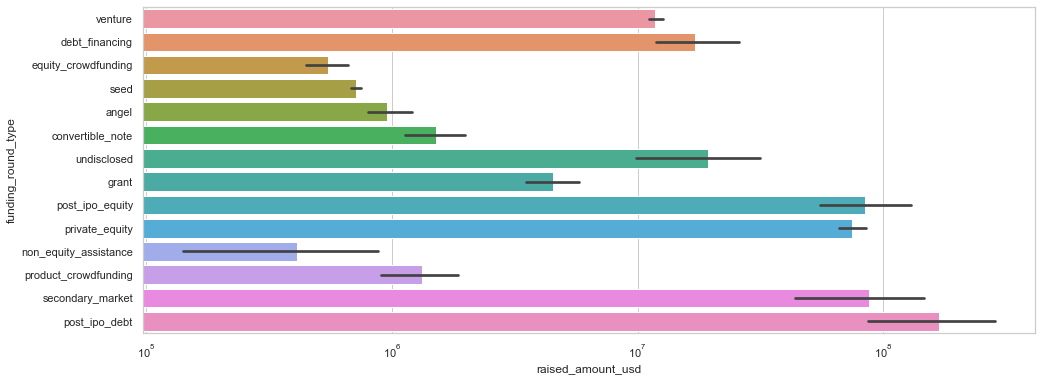

In [47]:
plt.figure(figsize=(16, 6))
firstPlot = sns.barplot(y="funding_round_type", x="raised_amount_usd", data=master_frame)
firstPlot.set_xscale('log')


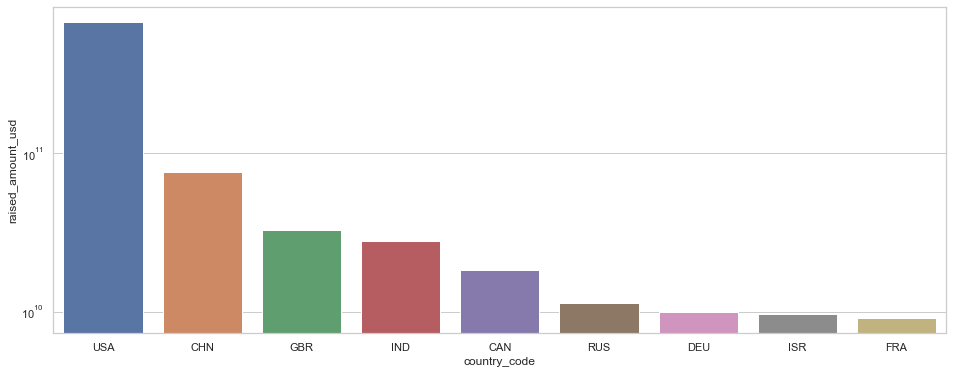

In [50]:
top9.reset_index(inplace=True)
plt.figure(figsize=(16, 6))
second_plot = sns.barplot(x='country_code', y='raised_amount_usd', data=top9)
second_plot.set_yscale('log')

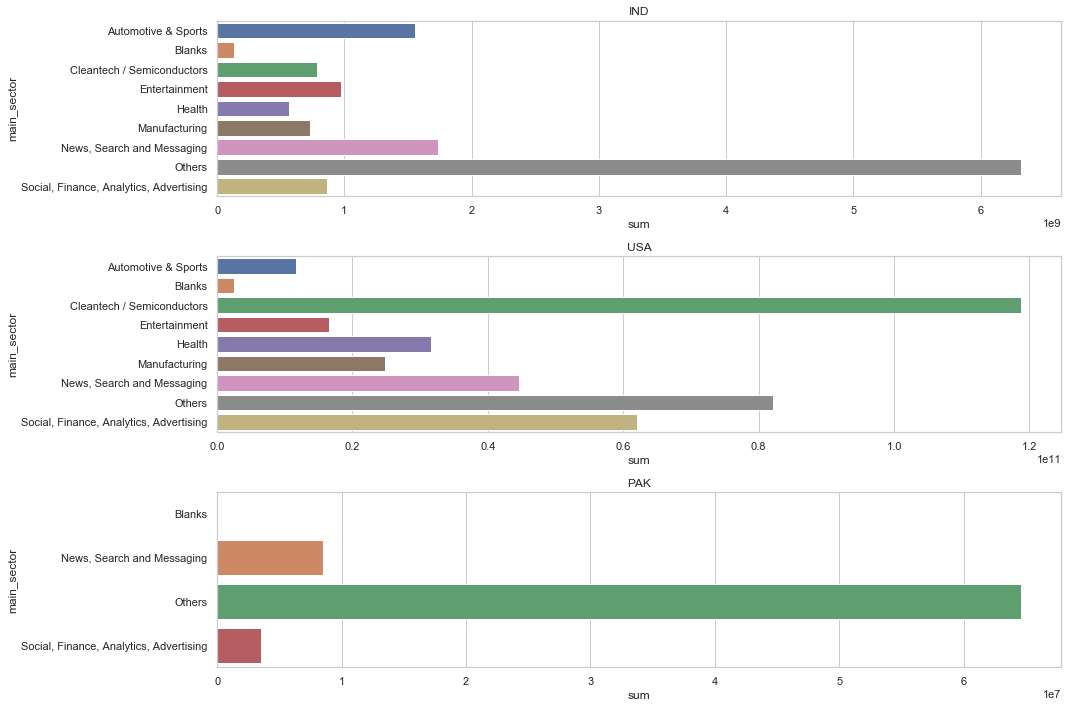

In [53]:
f, axes = plt.subplots(3, 1,figsize=(15,10))
d1= d1.raised_amount_usd
d1.reset_index(inplace=True)
sns.barplot(y='main_sector',x='sum',data=d1,ax=axes[0])
d2= d2.raised_amount_usd
d2.reset_index(inplace=True)
sns.barplot(y='main_sector',x='sum',data=d2,ax=axes[1])
d3= d3.raised_amount_usd
d3.reset_index(inplace=True)
sns.barplot(y='main_sector',x='sum',data=d3,ax=axes[2])
axes[0].set_title('IND')
axes[1].set_title('USA')
axes[2].set_title('PAK')
f.tight_layout()